In [3]:
from __future__ import print_function
import glob
import subprocess
import itertools
import os

from skbio.alignment import Alignment
from skbio.sequence import DNA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itolapi import Itol, ItolExport
from IPython.display import Image
%matplotlib inline

In [4]:
def read_fasta(file_handle):
    for header, group in itertools.groupby(file_handle, lambda line: line[0] == '>'):
        if header:
            line = group.next()
            name = line[1:].strip()
        else:
            seq = ''.join(line.strip() for line in group)
            yield name, seq

if os.path.exists("./new_plots/wc_only_g20/") == False:
    os.mkdir("./new_plots/wc_only_g20")

### Next I'd like to re-do the g20 figure with more representatives frm other locations... where are those g20 sequences...

** Note that all GL/RL/Sed Sanger seqs can be found in the file: **
```
/Users/juliambrown/Documents/6thYear/G20_for_ch3/AllGLSeqs_20140902.fas
```

Oh! and the unique group sequences can be found in:

```
/Users/juliambrown/Desktop/ThesisData/WC_Only_Manipulations/unique_wc_seqs.fasta
```

I'd like to insert some representative sequences from other studies in there to compare.  I can take the reps from my other chapter...which file?

Well, the different g20 popsets used can be found here:
```
/Users/juliambrown/Desktop/ThesisData/December2014_g20_aa/
```

In [6]:
for f in glob.glob("/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/*.fasta"):
    subprocess.call('grep -c ">" %s ' % f, shell=True)
    print(f)
wc_reps = '''Illumina_contig69_cov378.74
2836-g20-37
2839-g20-54
Illumina_contig41_cov81.53
4353-g20-6
2838-g20-1
2836-g20-41
Illumina_contig29_cov131.11
4353-g20-13_rev
4149-g20-18
4149-g20-4
Illumina_contig49_cov64.12
2839-g20-18
2836-g20-2
2839-g20-3
Illumina_contig70_cov144.68
4244-g20-28_rev
4167-g20-4_rev
4167-g20-23
4353-g20-7
Illumina_contig20_cov22.65
2839-g20-16
2839-g20-30
2839-g20-32
2838-g20-8
2836-g20-8
4353-g20-11
2839-g20-51
Illumina_contig57_cov70.11
2836-g20-23
Illumina_contig55_cov9.70
Illumina_contig46_cov6.94
'''.split()
wc_reps
to_use = glob.glob("/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/*.fasta")
these = (-2,-4,3,2,1)
thesetouse = []
for i in these:
    thesetouse.append(to_use[i])

thesetouse

/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/AtlanticTransect2011.fasta
/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/ChesapeakeBay.fasta
/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/CulturedRepSullivan2008.fasta
/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/LaurentianGreatLake2006.fasta
/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/PeriAlpine2004.fasta
/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/PeriAlpine2013.fasta
/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/SRIM2003.fasta
/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/SRIM2009.fasta
/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/Zhong2002.fasta


['/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/SRIM2009.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/PeriAlpine2013.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/LaurentianGreatLake2006.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/CulturedRepSullivan2008.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/ChesapeakeBay.fasta']

In [8]:
glseqs = "/Users/juliambrown/Desktop/Thesis_Data/g20/WC_Only_Manipulations/unique_wc_seqs.fasta"

with open("./new_plots/wc_only_g20/combined_g20_libraries.fasta", "w") as out:
    for i in thesetouse:
        with open(i) as infile:
            for name, seq in read_fasta(infile):
                print(">%s" % name, file=out)
                seq = seq.replace("-","")
                for i in range(0, len(seq), 80):
                    print(seq[i:i+80], file=out)
    with open(glseqs) as ih:
        for name, seq in read_fasta(ih):
            if name.split("\t")[0] in wc_reps or "T4" in name:
                print(name)
                print(">%s" % name.split("\t")[0], file=out)
                seq = seq.replace("-","")
                for i in range(0, len(seq), 80):
                    print(seq[i:i+80], file=out)

4167-g20-4_rev	1|2
4167-g20-23	3|1
4244-g20-28_rev	2|2
2836-g20-2	6|3
2836-g20-37	11|1
2836-g20-41	12|2
2836-g20-8	13|1
2836-g20-23	21|1
4353-g20-6	1|5
4353-g20-11	3|1
4353-g20-7	6|1
4353-g20-13_rev	7|1
Illumina_contig69_cov378.74	1|1
Illumina_contig41_cov81.53	2|1
Illumina_contig29_cov131.11	3|1
Illumina_contig49_cov64.12	4|1
Illumina_contig70_cov144.68	5|1
Illumina_contig20_cov22.65	6|1
Illumina_contig46_cov6.94	7|1
Illumina_contig55_cov9.70	8|1
Illumina_contig57_cov70.11	9|1
2839-g20-54	5|3
2839-g20-32	12|1
2839-g20-30	13|1
2839-g20-3	14|1
2839-g20-18	17|1
2839-g20-51	20|1
2839-g20-16	21|1
2838-g20-8	26|1
2838-g20-1	27|1
4149-g20-18	1|1
4149-g20-4	3|2
Bacteriophage_T4_gene_20


In [9]:
!open ./new_plots/wc_only_g20/combined_g20_libraries.fasta -a textedit

next is to re-align them.

In [ ]:
!muscle -in ./new_plots/wc_only_g20/combined_g20_libraries.fasta -out ./new_plots/wc_only_g20/combog20aln.fasta

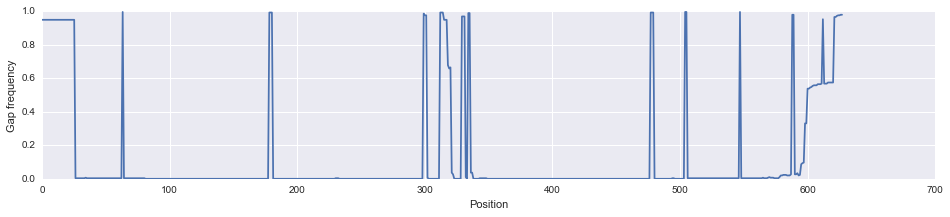

In [10]:
aln = Alignment.read(file = "./new_plots/wc_only_g20/combog20aln.fasta", format="fasta")
gap_freq = [d["-"] for d in aln.position_frequencies()]
fig, ax = plt.subplots()
fig.set_size_inches([16, 3])
ax.plot(np.arange(len(gap_freq)), gap_freq)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

In [11]:
keepers, = np.where(np.array(gap_freq)<=0.1)
aln_masked = aln.subalignment(positions_to_keep=keepers)

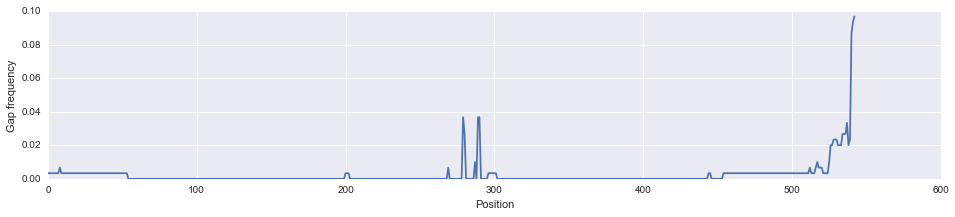

In [12]:
gap_freq2 = [d["-"] for d in aln_masked.position_frequencies()]
fig, ax = plt.subplots()
fig.set_size_inches([16, 3])
ax.plot(np.arange(len(gap_freq2)), gap_freq2)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

In [ ]:
aln_masked.write("./new_plots/wc_only_g20/combog20aln_0.1masked.fasta", format="fasta")

In [ ]:
%%bash
FastTree -nt ./new_plots/wc_only_g20/combog20aln_0.1masked.fasta > ./new_plots/wc_only_g20/combog20aln_0.1masked.tree

In [ ]:
#clade labels... 
with open("./new_plots/wc_only_g20/combog20aln_labels.txt", "w") as oh:
    print("TREE_COLORS", file=oh)
    print("SEPARATOR TAB", sep="\t", file=oh)
    #print("DATASET_LABEL", "origin", sep="\t", file=oh)
    #print("COLOR", "#ff0000", sep="\t", file=oh)
    print("DATA", file=oh)
    for j, i in enumerate(thesetouse):
        label = os.path.basename(i).replace(".fasta","")
        with open(i) as ih:
            for name, seq in read_fasta(ih):
                print(name,"range", colors[j],label, sep="\t", file = oh)
    for i in wc_reps:
        print(i, "range", colors[-1], "GL and RL" , sep="\t", file = oh)

!open ./new_plots/wc_only_g20/combog20aln_labels.txt -a textedit

In [ ]:
repdict = {}

with open("./new_plots/wc_only_g20/98_pct_wc_rep.csv") as ih:
    for line in ih.read().split("\r"):
        name, rep = line.split(",")
        repdict[name] = rep
repdict

In [ ]:
with open("./new_plots/wc_only_g20/combog20aln_representation.txt", "w") as oh:
    print("DATASET_SIMPLEBAR", file=oh)
    print("SEPARATOR TAB", file=oh)
    print("DATASET_LABEL", "simple bar", sep="\t", file=oh)
    print("DATA", file=oh)
    
    for i in wc_reps:
        print(i, repdict[i], sep="\t", file=oh)
        
!open ./new_plots/wc_only_g20/combog20aln_representation.txt -a textedit

Manually loaded files into iTol

In [14]:
#Image("./new_plots/wc_only_g20/GLwc_seq_comparison.png")

**figuring out where the information on the sequences relateding to the g20 primers can be found **

This document outlines the information associated with the primers I'd put together:
```
/Users/juliambrown/Documents/6thYear/GLSequences/g20_RLCP_qPCR_Primers.docx
```

States that primers target the following g20 groups:
RLCP1: clusters 24 and 4C
RLCP2A: cluster 21

Information on RLCP4 missing.  Hmm.  Probably in my lab notebook, but who knows where that is at this point. 

Able to deduce based on this figure:
```
/Users/juliambrown/Desktop/Thesis_Data/g20/WC_Only_Manipulations/98Percent_g20WC_ClusteringTree.pptx
```

and this cluster information:
```
/Users/juliambrown/Desktop/Thesis_Data/g20/WC_Only_Manipulations/ClusterInfo.xlsx
```

that RLCP4 targets a cluster with 7 members, on the opposite clade from the other two primer targets.  There are only two clusters with 7 members, and only one on the opposite clade from the other two primer targets.  The cluster representative is: 2838-g20-1.

I'll do an alignment just to make sure that the primer sequence does indeed target this sequence.

In [25]:
# gather the sequences
seq_set = "2838-g20-1	2839-g20-46	2839-g20-13	2839-g20-35	2836-g20-6	2836-g20-33	2836-g20-21"
seqs = seq_set.split("\t")
seqs

['2838-g20-1',
 '2839-g20-46',
 '2839-g20-13',
 '2839-g20-35',
 '2836-g20-6',
 '2836-g20-33',
 '2836-g20-21']

In [28]:
#into fasta file
glseqs = "/Users/juliambrown/Desktop/Thesis_Data/g20/WC_Only_Manipulations/Alignments/CuratedGLSeqs_wc_Only_updated4-30-2014.fas"


with open("./new_plots/wc_only_g20/test_rlcp4_seqs.fasta", "w") as oh, open(glseqs) as ih:
    for name, seq in read_fasta(ih):
        if name.split()[0] in seqs:
            print(name.split()[0])
            print(">{name}".format(**locals()), file=oh)
            for i in range(0, len(seq), 80):
                print(seq[i:i+80], file=oh)

2836-g20-21
2836-g20-33
2836-g20-6
2838-g20-1
2839-g20-13
2839-g20-35
2839-g20-46


In [55]:
primers = '''>rlcp4_f
CAAAATCTTGGAGAACTTGCTG
>rlcp4_r
TTTCAATCTTGGYCGTTCAT
>rlcp4_probe
CGAATYGATGTTGGTGGTGGTGG
'''
#note reverse sequence has been reverse complemented
print(primers.strip(), file=open("./new_plots/wc_only_g20/rlcp4_primers.fasta", "w"))

In [51]:
primers

'>rlcp4_f\nCAAAATCTTGGAGAACTTGCTG\n>rlcp4_r\nTTTCAATCTTGGYCGTTCAT\n>rlcp4_probe\nCGAATYGATGTTGGTGGTGGTGG\n'

In [52]:
with open("./new_plots/wc_only_g20/test_rlcp4_seqs_primers.fasta", "w") as oh, open(glseqs) as ih:
    for name, seq in read_fasta(ih):
        if name.split()[0] in seqs:
            print(name.split()[0])
            print(">{name}".format(**locals()), file=oh)
            for i in range(0, len(seq), 80):
                print(seq[i:i+80], file=oh)
    print(primers.strip("\n"), file=oh)

2836-g20-21
2836-g20-33
2836-g20-6
2838-g20-1
2839-g20-13
2839-g20-35
2839-g20-46


In [53]:
!muscle -in ./new_plots/wc_only_g20/test_rlcp4_seqs_primers.fasta -out ./new_plots/wc_only_g20/test_rlcp4_aln.fasta


MUSCLE v3.6 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

test_rlcp4_seqs_primers 10 seqs, max length 548, avg  length 390
00:00:00     10 MB(2%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     10 MB(2%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00     10 MB(2%)  Iter   1  100.00%  Align node
00:00:00     10 MB(2%)  Iter   1  100.00%  Root alignment
00:00:00     10 MB(2%)  Iter   2  100.00%  Refine tree
00:00:00     10 MB(2%)  Iter   2  100.00%  Root alignment
00:00:00     10 MB(2%)  Iter   2  100.00%  Root alignment
00:00:00     10 MB(2%)  Iter   3  100.00%  Refine biparts


In [54]:
!open ./new_plots/wc_only_g20/test_rlcp4_aln.fasta

Confirmed.  Primers match this group identically.

** Now going to cluster the pop sets at 98% identity before aligning to consolidate the g20 tree **

In [64]:
%%bash
~/Desktop/usearch -cluster_fast /Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/SRIM2009.fasta -id 0.98 -centroids ./new_plots/wc_only_g20/srim2009_98.fasta -uc ./new_plots/wc_only_g20/srim2009clusters.uc

usearch v8.1.1861_i86osx32, 4.0Gb RAM (8.6Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

Licensed to: jmb636@cornell.edu



00:00 1.4Mb  100.0% Reading /Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/SRIM2009.fasta
00:00 1.4Mb Pass 1...60 seqs, 9 uniques, 2 singletons (22.2%)                                        
00:00 1.5Mb Min size 1, median 5, max 31, avg 6.67
00:00 1.5Mb done.
00:00 3.2Mb  100.0% 5 clusters, max size 34, avg 12.0
00:00 3.2Mb  100.0% Writing centroids to ./new_plots/wc_only_g20/srim2009_98.fasta
                                                                                  
      Seqs  9
  Clusters  5
  Max size  34
  Avg size  12.0
  Min size  5
Singletons  0, 0.0% of seqs, 0.0% of clusters
   Max mem  3.2Mb
      Time  1.00s
Throughput  9.0 seqs/sec.



In [66]:
if os.path.exists("./new_plots/wc_only_g20/pop_clusts/") == False:
    os.mkdir("./new_plots/wc_only_g20/pop_clusts/")

In [91]:
to_use = glob.glob("/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/*.fasta")
new_fastas = []
for f in to_use:
    name = os.path.basename(f).strip(".fasta")
    new_fasta = "./new_plots/wc_only_g20/pop_clusts/{name}.fasta".format(**locals())
    outuc = "./new_plots/wc_only_g20/pop_clusts/{name}.uc".format(**locals())
    if "Atlantic" in f:
        pctid = .90
    else:
        pctid = .98
        
    cmd = "~/Desktop/usearch -cluster_fast {f} -id {pctid} -centroids {new_fasta} -uc {outuc}".format(**locals())
    subprocess.call(cmd, shell=True)
    new_fastas.append(new_fasta)
    

In [92]:
wc_reps = '''Illumina_contig69_cov378.74
2836-g20-37
2839-g20-54
Illumina_contig41_cov81.53
4353-g20-6
2838-g20-1
2836-g20-41
Illumina_contig29_cov131.11
4353-g20-13_rev
4149-g20-18
4149-g20-4
Illumina_contig49_cov64.12
2839-g20-18
2836-g20-2
2839-g20-3
Illumina_contig70_cov144.68
4244-g20-28_rev
4167-g20-4_rev
4167-g20-23
4353-g20-7
Illumina_contig20_cov22.65
2839-g20-16
2839-g20-30
2839-g20-32
2838-g20-8
2836-g20-8
4353-g20-11
2839-g20-51
Illumina_contig57_cov70.11
2836-g20-23
Illumina_contig55_cov9.70
Illumina_contig46_cov6.94
'''.split()

glseqs = glseqs = "/Users/juliambrown/Desktop/Thesis_Data/g20/WC_Only_Manipulations/unique_wc_seqs.fasta"

In [93]:
with open("./new_plots/wc_only_g20/pop_clusts/pop_set_data.txt", "w") as data, open("./new_plots/wc_only_g20/pop_clusts/pop_set_clusts_combo.fasta", "w") as ofasta:
    for n in new_fastas:
        for name, seq in read_fasta(open(n)):
            print(">{name}".format(**locals()), file = ofasta)
            for i in range(0, len(seq), 80):
                print(seq[i:i+80], file = ofasta)
            print(name, os.path.basename(n).strip(".fasta"), sep="\t", file = data)
    with open(glseqs) as ih:
        for name, seq in read_fasta(ih):
            if name.split("\t")[0] in wc_reps or "T4" in name:
                print(name)
                print(">%s" % name.split("\t")[0], file=ofasta)
                seq = seq.replace("-","")
                for i in range(0, len(seq), 80):
                    print(seq[i:i+80], file=ofasta)
                print(name, "gl_rl_wc", sep="\t", file=data)

4167-g20-4_rev	1|2
4167-g20-23	3|1
4244-g20-28_rev	2|2
2836-g20-2	6|3
2836-g20-37	11|1
2836-g20-41	12|2
2836-g20-8	13|1
2836-g20-23	21|1
4353-g20-6	1|5
4353-g20-11	3|1
4353-g20-7	6|1
4353-g20-13_rev	7|1
Illumina_contig69_cov378.74	1|1
Illumina_contig41_cov81.53	2|1
Illumina_contig29_cov131.11	3|1
Illumina_contig49_cov64.12	4|1
Illumina_contig70_cov144.68	5|1
Illumina_contig20_cov22.65	6|1
Illumina_contig46_cov6.94	7|1
Illumina_contig55_cov9.70	8|1
Illumina_contig57_cov70.11	9|1
2839-g20-54	5|3
2839-g20-32	12|1
2839-g20-30	13|1
2839-g20-3	14|1
2839-g20-18	17|1
2839-g20-51	20|1
2839-g20-16	21|1
2838-g20-8	26|1
2838-g20-1	27|1
4149-g20-18	1|1
4149-g20-4	3|2
Bacteriophage_T4_gene_20


In [94]:
!open ./new_plots/wc_only_g20/pop_clusts/pop_set_data.txt
!open ./new_plots/wc_only_g20/pop_clusts/pop_set_clusts_combo.fasta

In [95]:
!muscle -in ./new_plots/wc_only_g20/pop_clusts/pop_set_clusts_combo.fasta -out ./new_plots/wc_only_g20/pop_clusts/pop_set_clusts_combo_aln.fasta


MUSCLE v3.6 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

pop_set_clusts_combo 411 seqs, max length 599, avg  length 542
00:00:01     10 MB(2%)  Iter   1  100.00%  K-mer dist pass 1
00:00:01     10 MB(2%)  Iter   1  100.00%  K-mer dist pass 2
00:00:04     10 MB(2%)  Iter   1  100.00%  Align node
00:00:04     10 MB(2%)  Iter   1  100.00%  Root alignment
00:00:06     10 MB(2%)  Iter   2  100.00%  Refine tree
00:00:06     10 MB(2%)  Iter   2  100.00%  Root alignment
00:00:06     10 MB(2%)  Iter   2  100.00%  Root alignment
00:00:39     10 MB(2%)  Iter   3  100.00%  Refine biparts
00:01:17     10 MB(2%)  Iter   4  100.00%  Refine biparts
00:01:18     10 MB(2%)  Iter   5  100.00%  Refine biparts
00:01:18     10 MB(2%)  Iter   5  100.00%  Refine biparts


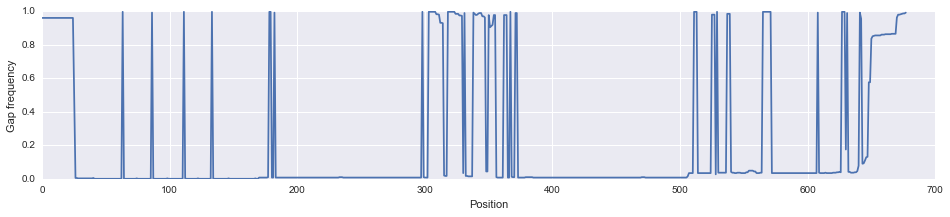

In [96]:
aln = Alignment.read(file = "./new_plots/wc_only_g20/pop_clusts/pop_set_clusts_combo_aln.fasta", format="fasta")
gap_freq = [d["-"] for d in aln.position_frequencies()]
fig, ax = plt.subplots()
fig.set_size_inches([16, 3])
ax.plot(np.arange(len(gap_freq)), gap_freq)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

In [97]:
keepers, = np.where(np.array(gap_freq)<=0.1)
aln_masked = aln.subalignment(positions_to_keep=keepers)

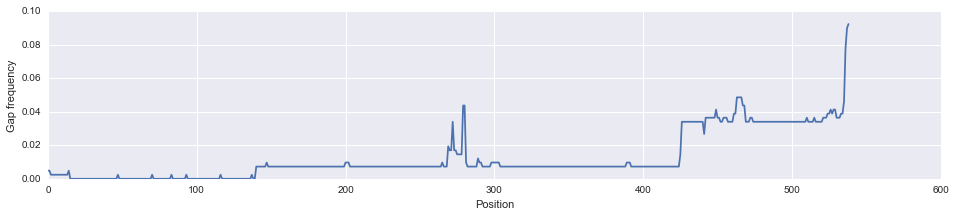

In [98]:
gap_freq2 = [d["-"] for d in aln_masked.position_frequencies()]
fig, ax = plt.subplots()
fig.set_size_inches([16, 3])
ax.plot(np.arange(len(gap_freq2)), gap_freq2)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

In [99]:
aln_masked.write("./new_plots/wc_only_g20/pop_clusts/combog20aln_0.1masked.fasta", format="fasta")

'./new_plots/wc_only_g20/pop_clusts/combog20aln_0.1masked.fasta'

In [100]:
%%bash
FastTree -nt ./new_plots/wc_only_g20/pop_clusts/combog20aln_0.1masked.fasta > ./new_plots/wc_only_g20/pop_clusts/combog20aln_0.1masked.tree

FastTree Version 2.1.8 SSE3
Alignment: ./new_plots/wc_only_g20/pop_clusts/combog20aln_0.1masked.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Ignored unknown character X (seen 6 times)
Ignored unknown character Y (seen 9 times)
      0.11 seconds: Joined    100 of    406
      0.27 seconds: Joined    300 of    406
Initial topology in 0.37 seconds
Refining topology: 35 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.37 seconds: ME NNI round 1 of 35, 101 of 407 splits, 11 changes (max delta 0.020)
      0.57 seconds: SPR round   1 of   2, 101 of 816 nodes
      0.74 seconds: SPR round   1 of   2, 201 of 816 nodes
      0.91 seconds: SPR round   1 of   2, 301 of 816 nodes
      1.05 seconds: SPR round   1 of   2, 401 of 816 nodes
      1.18 seconds: SPR round   1 of   2,

In [101]:
to_use = glob.glob("/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/*.fasta")
to_use

['/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/AtlanticTransect2011.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/ChesapeakeBay.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/CulturedRepSullivan2008.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/LaurentianGreatLake2006.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/PeriAlpine2004.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/PeriAlpine2013.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/SRIM2003.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/SRIM2009.fasta',
 '/Users/juliambrown/Desktop/Thesis_Data/December2014_g20_aa/Zhong2002.fasta']

In [103]:
colors = ["#BF5037",
"#494036",
"#BEA641",
"#85D249",
"#71BA80",
"#88B9C6",
"#716FB4",
"#C159CC",
"#B04C7B",
"#C6A58F"]

#clade labels... 
with open("./new_plots/wc_only_g20/pop_clusts/combog20aln_labels.txt", "w") as oh:
    print("TREE_COLORS", file=oh)
    print("SEPARATOR TAB", sep="\t", file=oh)
    #print("DATASET_LABEL", "origin", sep="\t", file=oh)
    #print("COLOR", "#ff0000", sep="\t", file=oh)
    print("DATA", file=oh)
    for j, i in enumerate(to_use):
        label = os.path.basename(i).replace(".fasta","")
        with open(i) as ih:
            for name, seq in read_fasta(ih):
                print(name,"range", colors[j],label, sep="\t", file = oh)
    for i in wc_reps:
        print(i, "range", colors[-1], "GL and RL" , sep="\t", file = oh)

!open ./new_plots/wc_only_g20/pop_clusts/combog20aln_labels.txt -a textedit

In [7]:
ih = open("/Users/juliambrown/Desktop/Thesis_Data/g20/WC_Only_Manipulations/wc_groups.txt").read().split("\r")
sd = {}
for l in ih:
    sd[l.split("\t")[0].split("-")[0]] = l.split("\t")[1]
sd

{'2835': 'G-M2',
 '2836': 'G-M2',
 '2838': 'R-M2',
 '2839': 'R-M2',
 '4040': 'R-J2',
 '4149': 'R-S2',
 '4167': 'G-A3',
 '4244': 'G-J3',
 '4353': 'G-S3',
 'Bacteriophage_T4_gene_20': 'OG\n2839-g20-47',
 'Illumina_contig20_cov22.65': 'I-Ia',
 'Illumina_contig29_cov131.11': 'I-Ia',
 'Illumina_contig41_cov81.53': 'I-Ia',
 'Illumina_contig46_cov6.94': 'I-Ia',
 'Illumina_contig49_cov64.12': 'I-Ia',
 'Illumina_contig55_cov9.70': 'I-Ia',
 'Illumina_contig57_cov70.11': 'I-Ia',
 'Illumina_contig69_cov378.74': 'I-Ia',
 'Illumina_contig70_cov144.68': 'I-Ia'}

In [12]:
fpname = "cps1.1"
fwdprim = "GTAGWATWTTYTAYATTGAYGTWGG"
rpname = "cps8.1"
revprim = "ARTAYTTDCCDAYRWAWGGWTC"
gloc = "43.051967, -75.965185"
rloc = "43.046181, -75.975639"


print("seqID", "Organism", "isolation_source", "country", "lat-lon", "Fwd-PCR-primer-name", "Fwd-PCR-primer-seq", "Rev-PCR-primer-name", "Rev-PCR-primer-seq", sep="\t")


seqID	Organism	isolation_source	country	lat-lon	Fwd-PCR-primer-name	Fwd-PCR-primer-seq	Rev-PCR-primer-name	Rev-PCR-primer-seq


In [17]:
ofname = '/Users/juliambrown/Documents/6thYear/TimeSeries/RevisionsCode/new_plots/gl_rl_wc_g20.fasta'
of2name = '/Users/juliambrown/Documents/6thYear/TimeSeries/RevisionsCode/new_plots/gl_rl_wc_g20.txt'
ifname = '/Users/juliambrown/Documents/6thYear/G20_for_ch3/AllGLSeqs_20140902.fas'

with open(ifname) as infile, open(ofname, "w") as outfile, open(of2name, "w") as out2:
    print("seqID", "Organism", "clone", "isolation_source", "country", "lat-lon", "Fwd-PCR-primer-name", "Fwd-PCR-primer-seq", "Rev-PCR-primer-name", "Rev-PCR-primer-seq", sep="\t", file=out2)
    for name, seq in read_fasta(infile):
        if "x" not in name.lower() and "T4" not in name and "IGRL" not in name:
            l1 = sd.get(name.split("-")[0], "")
            if len(l1) > 0:
                letter = l1[0]
            else:
                letter = ""
            new_name = letter +name
            if letter == "G":
                lake = "Green Lake Surface Water"
                loc = gloc
            if letter == "R":
                lake = "Round Lake Surface Water"
                loc = rloc
            print(new_name, "uncultured phage {n}".format(n=new_name.replace("-",".")), new_name, lake, "USA", loc, fpname, fwdprim, rpname, revprim, sep="\t", file=out2)
            print(">", new_name, sep="", file=outfile)
            newseq=seq.replace("-","")
            for i in range(0, len(newseq), 80):
                print(newseq[i:i+80], file=outfile)

In [18]:
!open /Users/juliambrown/Documents/6thYear/TimeSeries/RevisionsCode/new_plots/gl_rl_wc_g20.fasta
!open /Users/juliambrown/Documents/6thYear/TimeSeries/RevisionsCode/new_plots/gl_rl_wc_g20.txt -a textedit

In [19]:
cyanos = '''2816ITS11  Syn rubescens
2821ITS5  Syn rubescens
2821ITS10  Syn rubescens
2816ITS7  Syn rubescens
2821ITS3  Syn rubescens
2821ITS7  Syn rubescens
2816ITS1  Cyanobium
cITS13001A1
cITS12001A1
cITS13002A1
2821ITS4  Uncultured Synechococcus
cITS12005A1
2816ITS10  Synechococcus
cITS12004A1
2816ITS4  Unclutured Cyanobacterium
2816ITS12  Uncultured cyanobacterium
2816ITS5  Synechococcus
2821ITS9  Uncultured Cyanobacterium
2816ITS2  Uncultured Cyanobacterium
2821ITS12  Uncultured Cyanobacterium
2821ITS11  Uncultured Cyanobacterium
2816ITS9  Uncultured Cyanobacterium 
2821ITS2  Uncultured Cyanobacterium
2816ITS8  Uncultured Cyanobacterium
cITS13004A1
cITS13003A1
cITS12002A2
'''

In [23]:
ids = []
for i in cyanos.split("\n"):
    if len(i.split()) > 1:
        ids.append(i.split()[0])
    else:
        ids.append(i)

In [24]:
ids

['2816ITS11',
 '2821ITS5',
 '2821ITS10',
 '2816ITS7',
 '2821ITS3',
 '2821ITS7',
 '2816ITS1',
 'cITS13001A1',
 'cITS12001A1',
 'cITS13002A1',
 '2821ITS4',
 'cITS12005A1',
 '2816ITS10',
 'cITS12004A1',
 '2816ITS4',
 '2816ITS12',
 '2816ITS5',
 '2821ITS9',
 '2816ITS2',
 '2821ITS12',
 '2821ITS11',
 '2816ITS9',
 '2821ITS2',
 '2816ITS8',
 'cITS13004A1',
 'cITS13003A1',
 'cITS12002A2',
 '']

In [30]:
fpname = "1247F"
fwdprim = "CGTACTACAATGGTTGGG"
rpname = "23S-125R"
revprim = "GGGTT[C/G/T]CCCCATTC[A/G]G"
gloc = "43.051967, -75.965185"
lake = "Fayetteville Green Lakes Surface"

print("seqID", "Organism", "isolation_source", "country", "lat-lon", "Fwd-PCR-primer-name", "Fwd-PCR-primer-seq", "Rev-PCR-primer-name", "Rev-PCR-primer-seq", sep="\t")

seqID	Organism	isolation_source	country	lat-lon	Fwd-PCR-primer-name	Fwd-PCR-primer-seq	Rev-PCR-primer-name	Rev-PCR-primer-seq


In [31]:
fasta = "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/2014_ITS_Combined.fas"
outfasta = "/Users/juliambrown/Documents/6thYear/TimeSeries/RevisionsCode/Cyano_ITS.fasta"
outinfo = "/Users/juliambrown/Documents/6thYear/TimeSeries/RevisionsCode/Cyano_ITS_info.txt"

with open(fasta) as infile, open(outfasta, "w") as out1, open(outinfo, "w") as out2:
    print("seqID", "Organism", "clone", "isolation_source", "country", "lat-lon", "Fwd-PCR-primer-name", "Fwd-PCR-primer-seq", "Rev-PCR-primer-name", "Rev-PCR-primer-seq", sep="\t", file=out2)
    for name, seq in read_fasta(infile):
        abrev = name.split()[0].replace("-","")
        if abrev in ids:
            print(abrev, "uncultured cyanobacterium {n}".format(n=abrev), abrev, lake, "USA", loc, fpname, fwdprim, rpname, revprim, sep="\t", file=out2)
            print(">", abrev, sep="", file=out1)
            for i in range(0, len(seq), 80):
                print(seq[i:i+80], file=out1)

In [32]:
!open /Users/juliambrown/Documents/6thYear/TimeSeries/RevisionsCode/Cyano_ITS.fasta
!open /Users/juliambrown/Documents/6thYear/TimeSeries/RevisionsCode/Cyano_ITS_info.txt